<a href="https://colab.research.google.com/github/MuhamedAdemi/Brainster-Python/blob/main/MuhamedAdemi_Project_Task_2_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Task 2 - Air Pollution Scenario

## Scenario details

The city of Skopje is well known for its struggles with poor air quality, especially in the winter months. The main pollutants are CO, NO2, ozone, and particulate matters of different dimensions.

Monitoring stations for measuring the concentrations of each of the main pollutants have been installed in different locations around the city.

The data for this scenario can be taken from kaggle (https://www.kaggle.com/datasets/cokastefan/pm10-pollution-data-in-skopje-from-2008-to-2018) where data from the monitoring stations (https://air.moepp.gov.mk/?page_id=175) for the period from Janaury 2007 to December 2018 has been compiled.

For each pollutant there is a separate dataset - CO.csv, NO2.csv, O3.csv, PM10.csv, and PM25.csv.

To make our task more managable, we will only be looking at data for the time period of five years, from January 2012 to December 2016.

## Questions to answer / Problems to solve

**Note:** Include explainations for all results you obtain and discuss the conclusions that can be drawn!

### Read the data from all 5 files and load that data into 5 separate dataframes. Then perform some exploatory analysis on each of the dataframes (get sense of the data) -- (2 points)

### Perform the appropriate preprocessing (include a brief description on the actions you chose to perform). Then concatanate all dataframes into one -- (3 points)

- Suggestions for preprocessing:
    - mobile feature details data for a station that is occasionally displaced, so this data can be dropped as it is not as accurate
    - splitting the datetime into date and time features
    - adding a type column for each dataframe indicating the type of the pollutant
    - .....


### Question: What location in Skopje has the highest average pollution for each of the pollutants? -- (2 points)

### Question: For every year, for each of the pollutants, what time stamp has the maximum pollution for every location? What time of the year seems to have the most pollution in Skopje? -- (2 points)

### Question: What month of the year has the highest average polution accross locations for each of the pollutants? -- (2 points)

### Question: What is the average pollution accross locations for every hour during the day?  -- (2 points)

### Calculate and display the average daily pollution accross locations on separate plots for each of the pollutants over time -- (3 points)

### Question: On how many days in each year, was the average value of PM10 meauserd accross locations worse than moderate? -- (3 points)

Use the following table detailing the range of values for PM10 and their meaning:

Good                                    0-50

Moderate 	                            51-154

Unhealthy for sensitive individuals 	155-254

Unhealthy 	                            255-354

Very unhealthy                          355-424

Hazardous                               425-504

### Create a bar plot showing the average number of days when the measured value for PM10 was worse than moderate on at least one location -- (3 points)

### Add five additional visualizations of your own choosing that show some results that you were interested in seeing. What can you conclude about them? -- (3 points)

## Solution

In [2]:
!gdown 1AEhBI4vMRPcddJTq499lNcn3_koDimDU

Downloading...
From: https://drive.google.com/uc?id=1AEhBI4vMRPcddJTq499lNcn3_koDimDU
To: /content/PM25.csv
100% 2.31M/2.31M [00:00<00:00, 126MB/s]


In [3]:
!gdown 1f8zQWhPOl5a2BiXTxXkl8X6f04k9yZXd

Downloading...
From: https://drive.google.com/uc?id=1f8zQWhPOl5a2BiXTxXkl8X6f04k9yZXd
To: /content/PM10.csv
100% 3.22M/3.22M [00:00<00:00, 185MB/s]


In [4]:
!gdown 1kqaNEo8yFMV-U8gbMf2bvxncdsVW6plq

Downloading...
From: https://drive.google.com/uc?id=1kqaNEo8yFMV-U8gbMf2bvxncdsVW6plq
To: /content/O3.csv
100% 2.96M/2.96M [00:00<00:00, 87.7MB/s]


In [5]:
!gdown 1NMPZOpamkRRMRiauC-0837yVjdGrL7AG

Downloading...
From: https://drive.google.com/uc?id=1NMPZOpamkRRMRiauC-0837yVjdGrL7AG
To: /content/NO2.csv
100% 2.88M/2.88M [00:00<00:00, 166MB/s]


In [6]:
!gdown 1laCr1kr7MStLLOuI1o6_m8z75MWFp5In

Downloading...
From: https://drive.google.com/uc?id=1laCr1kr7MStLLOuI1o6_m8z75MWFp5In
To: /content/CO.csv
100% 2.95M/2.95M [00:00<00:00, 161MB/s]


In [7]:
# Import the required libraries
import pandas as pd          # For data manipulation and analysis
import numpy as np           # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns        # For advanced visualizations



In [8]:
# Step 2: Load datasets for different pollutants
file_paths = {
    'CO': '/content/CO.csv',    # Carbon Monoxide dataset
    'NO2': '/content/NO2.csv',  # Nitrogen Dioxide dataset
    'O3': '/content/O3.csv',    # Ozone dataset
    'PM10': '/content/PM10.csv', # Particulate Matter <10µm
    'PM25': '/content/PM25.csv'  # Particulate Matter <2.5µm
}

datasets = {}
for pollutant, file in file_paths.items():
    datasets[pollutant] = pd.read_csv(file)

"""
Each pollutant dataset is read from a CSV file and stored in a dictionary with the pollutant name
as the key. This allows us to manage multiple datasets efficiently.
"""

'\nEach pollutant dataset is read from a CSV file and stored in a dictionary with the pollutant name\nas the key. This allows us to manage multiple datasets efficiently.\n'

In [9]:
# Define the date range for filtering
start_date = "2012-01-01"
end_date = "2016-12-31"

# Function to filter a dataset based on the date range
def filter_by_date(dataframe, date_column='time'):
    # Convert the date column to datetime format if not already
    dataframe[date_column] = pd.to_datetime(dataframe[date_column])
    # Filter the dataset for the desired date range
    filtered_data = dataframe[(dataframe[date_column] >= start_date) & (dataframe[date_column] <= end_date)]
    return filtered_data

# Create a dictionary to store the filtered datasets
filtered_datasets = {}

# Filter each dataset based on the 'time' column
for pollutant, df in datasets.items():
    filtered_datasets[pollutant] = filter_by_date(df, date_column='time')

# Display the first few rows of each filtered dataset for verification
for pollutant, filtered_df in filtered_datasets.items():
    print(f"Filtered {pollutant} dataset:")
    print(filtered_df.head(), "\n")


Filtered CO dataset:
   Unnamed: 0.1  Unnamed: 0  Centar  GaziBaba  Karpos  Lisice  Miladinovci  \
0         36212       36212  0.2876    0.9219  0.5644     NaN          NaN   
1         36213       36213  0.1538    1.2029  0.8275     NaN       0.3858   
2         36214       36214  0.1600    1.3198  0.7423     NaN       0.3346   
3         36215       36215  0.1699    1.1449  0.4445     NaN       0.3549   
4         36216       36216  0.1539    0.8092  0.5121     NaN       0.2553   

   Mobile  Rektorat                time  
0     NaN    0.3708 2012-01-01 00:00:00  
1     NaN    0.4097 2012-01-01 01:00:00  
2     NaN    0.4061 2012-01-01 02:00:00  
3     NaN    0.6500 2012-01-01 03:00:00  
4     NaN    0.7198 2012-01-01 04:00:00   

Filtered NO2 dataset:
   Unnamed: 0.1  Unnamed: 0   Centar  GaziBaba   Karpos   Lisice  Miladinovci  \
0         36212       36212  27.5615       NaN  31.1979  40.2691          NaN   
1         36213       36213  16.1041       NaN  34.4904  33.3520        

In [10]:
# Function to remove unwanted columns
def clean_columns(dataframe):
    # Drop the 'mobile' column if it exists
    if 'Mobile' in dataframe.columns:
        dataframe = dataframe.drop(columns=['Mobile'])
    # Drop unnamed columns
    dataframe = dataframe.loc[:, ~dataframe.columns.str.contains('^Unnamed')]
    return dataframe

# Clean each dataset
cleaned_datasets = {}

for pollutant, df in filtered_datasets.items():
    cleaned_datasets[pollutant] = clean_columns(df)

# Display the first few rows of each cleaned dataset for verification
for pollutant, cleaned_df in cleaned_datasets.items():
    print(f"Cleaned {pollutant} dataset:")
    print(cleaned_df.head(), "\n")


Cleaned CO dataset:
   Centar  GaziBaba  Karpos  Lisice  Miladinovci  Rektorat                time
0  0.2876    0.9219  0.5644     NaN          NaN    0.3708 2012-01-01 00:00:00
1  0.1538    1.2029  0.8275     NaN       0.3858    0.4097 2012-01-01 01:00:00
2  0.1600    1.3198  0.7423     NaN       0.3346    0.4061 2012-01-01 02:00:00
3  0.1699    1.1449  0.4445     NaN       0.3549    0.6500 2012-01-01 03:00:00
4  0.1539    0.8092  0.5121     NaN       0.2553    0.7198 2012-01-01 04:00:00 

Cleaned NO2 dataset:
    Centar  GaziBaba   Karpos   Lisice  Miladinovci  Rektorat  \
0  27.5615       NaN  31.1979  40.2691          NaN       NaN   
1  16.1041       NaN  34.4904  33.3520          NaN       NaN   
2   2.8074       NaN   3.2517  32.6270          NaN       NaN   
3   2.3009       NaN  27.3558  27.2408          NaN       NaN   
4  20.5436       NaN  39.6147  41.2352          NaN       NaN   

                 time  
0 2012-01-01 00:00:00  
1 2012-01-01 01:00:00  
2 2012-01-01 02:00:0

In [11]:
# Function to extract Month, Year, and Hour from the Time column
def extract_time_features(dataframe):
    # Ensure 'Time' column is in datetime format
    dataframe['time'] = pd.to_datetime(dataframe['time'])
    # Extract Month, Year, and Hour
    dataframe['Month'] = dataframe['time'].dt.month
    dataframe['Year'] = dataframe['time'].dt.year
    dataframe['Hour'] = dataframe['time'].dt.hour
    return dataframe

# Apply the function to all cleaned datasets
for pollutant, df in cleaned_datasets.items():
    cleaned_datasets[pollutant] = extract_time_features(df)

# Display the first few rows of one dataset for verification
for pollutant, updated_df in cleaned_datasets.items():
    print(f"Dataset for {pollutant}:")
    print(updated_df.head(), "\n")


Dataset for CO:
   Centar  GaziBaba  Karpos  Lisice  Miladinovci  Rektorat  \
0  0.2876    0.9219  0.5644     NaN          NaN    0.3708   
1  0.1538    1.2029  0.8275     NaN       0.3858    0.4097   
2  0.1600    1.3198  0.7423     NaN       0.3346    0.4061   
3  0.1699    1.1449  0.4445     NaN       0.3549    0.6500   
4  0.1539    0.8092  0.5121     NaN       0.2553    0.7198   

                 time  Month  Year  Hour  
0 2012-01-01 00:00:00      1  2012     0  
1 2012-01-01 01:00:00      1  2012     1  
2 2012-01-01 02:00:00      1  2012     2  
3 2012-01-01 03:00:00      1  2012     3  
4 2012-01-01 04:00:00      1  2012     4   

Dataset for NO2:
    Centar  GaziBaba   Karpos   Lisice  Miladinovci  Rektorat  \
0  27.5615       NaN  31.1979  40.2691          NaN       NaN   
1  16.1041       NaN  34.4904  33.3520          NaN       NaN   
2   2.8074       NaN   3.2517  32.6270          NaN       NaN   
3   2.3009       NaN  27.3558  27.2408          NaN       NaN   
4  20.543

In [12]:
# ----------------------------------------------
# Function to transform each dataset into the desired format
# ----------------------------------------------
def transform_dataset(dataframe, pollutant_name):
    """
    Transforms a dataset into a consistent format:
    - Extracts time features (Date, Time, Month, Year, Hour)
    - Melts the dataset to create 'Location' and pollutant-specific columns
    - Filters out invalid locations ('Unnamed: 0', 'Unnamed: 0.1')
    """
    # Create a copy to avoid SettingWithCopyWarning
    dataframe = dataframe.copy()

    # Ensure 'time' column is in datetime format
    dataframe['time'] = pd.to_datetime(dataframe['time'], errors='coerce')

    # Extract Date and Time
    dataframe['Date'] = dataframe['time'].dt.date
    dataframe['Time'] = dataframe['time'].dt.time

    # Extract Month, Year, and Hour
    dataframe['Month'] = dataframe['time'].dt.month
    dataframe['Year'] = dataframe['time'].dt.year
    dataframe['Hour'] = dataframe['time'].dt.hour

    # Drop the original 'time' column as it's now split
    dataframe = dataframe.drop(columns=['time'])

    # Melt the dataset to standardize the format
    melted_df = dataframe.melt(
        id_vars=['Date', 'Time', 'Month', 'Year', 'Hour'],
        var_name='Location',
        value_name=pollutant_name
    )

    # Remove rows with unwanted locations
    melted_df = melted_df[~melted_df['Location'].isin(['Unnamed: 0', 'Unnamed: 0.1'])]

    return melted_df

# ----------------------------------------------
# Transform datasets from filtered_datasets
# ----------------------------------------------
# List to store transformed datasets
transformed_datasets = []

# Process each dataset from filtered_datasets and append it to the list
for pollutant, df in filtered_datasets.items():
    transformed_df = transform_dataset(df, pollutant_name=pollutant)
    transformed_datasets.append(transformed_df)

# ----------------------------------------------
# Merge all transformed datasets into final_dataset
# ----------------------------------------------
final_dataset = transformed_datasets[0]

for next_dataset in transformed_datasets[1:]:
    final_dataset = final_dataset.merge(
        next_dataset,
        on=['Date', 'Time', 'Location', 'Month', 'Year', 'Hour'],
        how='outer'
    )

# Display the first few rows of the cleaned final dataset
print(final_dataset.head())


         Date      Time  Month  Year  Hour     Location      CO      NO2  \
0  2012-01-01  00:00:00      1  2012     0       Centar  0.2876  27.5615   
1  2012-01-01  00:00:00      1  2012     0     GaziBaba  0.9219      NaN   
2  2012-01-01  00:00:00      1  2012     0       Karpos  0.5644  31.1979   
3  2012-01-01  00:00:00      1  2012     0       Lisice     NaN  40.2691   
4  2012-01-01  00:00:00      1  2012     0  Miladinovci     NaN      NaN   

        O3      PM10     PM25  
0  22.6658   33.3369  21.8149  
1      NaN  147.0360      NaN  
2  22.7910   53.5518  39.5599  
3   8.0383   51.4799      NaN  
4      NaN    4.0717      NaN  


In [13]:
# Calculate the total number of rows in the dataset
total_rows = len(final_dataset)

# Calculate the number of non-missing (available) values for each column
available_values = final_dataset.notnull().sum()

# Calculate the percentage of available values for each column
available_percentage = (available_values / total_rows) * 100

# Combine results into a summary DataFrame
data_availability = pd.DataFrame({
    'Available Values': available_values,
    'Total Rows': total_rows,
    'Available Percentage (%)': available_percentage
})

# Display the summary
data_availability
final_dataset

,Date,Time,Month,Year,Hour,Location,CO,NO2,O3,PM10,PM25
0,2012-01-01,00:00:00,1,2012,0,Centar,0.2876,27.5615,22.6658,33.3369,21.8149
1,2012-01-01,00:00:00,1,2012,0,GaziBaba,0.9219,NaN,NaN,147.0360,NaN
2,2012-01-01,00:00:00,1,2012,0,Karpos,0.5644,31.1979,22.7910,53.5518,39.5599
3,2012-01-01,00:00:00,1,2012,0,Lisice,NaN,40.2691,8.0383,51.4799,NaN
4,2012-01-01,00:00:00,1,2012,0,Miladinovci,NaN,NaN,NaN,4.0717,NaN
...,...,...,...,...,...,...,...,...,...,...,...
624423,2016-12-31,00:00:00,12,2016,0,Karpos,0.0935,8.0822,50.3256,30.3529,25.6266
624424,2016-12-31,00:00:00,12,2016,0,Lisice,0.1972,6.0929,17.4800,34.5900,NaN
624425,2016-12-31,00:00:00,12,2016,0,Miladinovci,0.3480,3.8582,47.0000,31.4100,NaN
624426,2016-12-31,00:00:00,12,2016,0,Mobile,NaN,NaN,NaN,NaN,NaN


In [14]:
# Function to fill missing values for each pollutant column
def fill_missing_values(data, column):
    # Fill missing values using linear interpolation within each 'Location' group
    data[column] = data.groupby('Location')[column].transform(
        lambda group: group.interpolate(method='linear', limit_direction='both')
    )
    # Fill any remaining missing values with the mean grouped by Location and Hour
    data[column] = data[column].fillna(
        data.groupby(['Location', 'Hour'])[column].transform('mean')
    )
    # Fill any remaining missing values with the overall mean of the column
    data[column] = data[column].fillna(data[column].mean())
    return data

# List of pollutant columns to fill
pollutants = ['CO', 'NO2', 'O3', 'PM10', 'PM25']

# Apply the filling strategy to each pollutant column
for pollutant in pollutants:
    final_dataset = fill_missing_values(final_dataset, pollutant)

# Display the updated availability after filling
filled_availability = final_dataset.notnull().sum() / len(final_dataset) * 100
print(filled_availability)


Date        100.0
Time        100.0
Month       100.0
Year        100.0
Hour        100.0
Location    100.0
CO          100.0
NO2         100.0
O3          100.0
PM10        100.0
PM25        100.0
dtype: float64


In [15]:
# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in final_dataset.columns:
    final_dataset = final_dataset.drop(columns=['Unnamed: 0'])

# Verify the remaining columns
print(final_dataset.columns)


final_dataset

Index(['Date', 'Time', 'Month', 'Year', 'Hour', 'Location', 'CO', 'NO2', 'O3',
       'PM10', 'PM25'],
      dtype='object')


,Date,Time,Month,Year,Hour,Location,CO,NO2,O3,PM10,PM25
0,2012-01-01,00:00:00,1,2012,0,Centar,0.287600,27.561500,22.665800,33.336900,21.814900
1,2012-01-01,00:00:00,1,2012,0,GaziBaba,0.921900,17.533800,34.988848,147.036000,40.950517
2,2012-01-01,00:00:00,1,2012,0,Karpos,0.564400,31.197900,22.791000,53.551800,39.559900
3,2012-01-01,00:00:00,1,2012,0,Lisice,9.164000,40.269100,8.038300,51.479900,40.950517
4,2012-01-01,00:00:00,1,2012,0,Miladinovci,0.385800,7.601800,52.140000,4.071700,40.950517
...,...,...,...,...,...,...,...,...,...,...,...
624423,2016-12-31,00:00:00,12,2016,0,Karpos,0.093500,8.082200,50.325600,30.352900,25.626600
624424,2016-12-31,00:00:00,12,2016,0,Lisice,0.197200,6.092900,17.480000,34.590000,40.950517
624425,2016-12-31,00:00:00,12,2016,0,Miladinovci,0.348000,3.858200,47.000000,31.410000,40.950517
624426,2016-12-31,00:00:00,12,2016,0,Mobile,1.949139,21.998021,34.988848,70.467941,40.950517


In [16]:
# Check column names in final_dataset
print(final_dataset.columns)
# Drop 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in final_dataset.columns:
    final_dataset = final_dataset.drop(columns=['Unnamed: 0'])


Index(['Date', 'Time', 'Month', 'Year', 'Hour', 'Location', 'CO', 'NO2', 'O3',
       'PM10', 'PM25'],
      dtype='object')


In [17]:
# Check unique values in the 'Location' column
print(final_dataset['Location'].unique())


['Centar' 'GaziBaba' 'Karpos' 'Lisice' 'Miladinovci' 'Mobile' 'Rektorat']


In [18]:
# Filter out invalid rows if necessary
final_dataset = final_dataset[final_dataset['Location'].notnull()]


In [19]:
final_dataset.isnull()
final_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624428 entries, 0 to 624427
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      624428 non-null  object 
 1   Time      624428 non-null  object 
 2   Month     624428 non-null  int32  
 3   Year      624428 non-null  int32  
 4   Hour      624428 non-null  int32  
 5   Location  624428 non-null  object 
 6   CO        624428 non-null  float64
 7   NO2       624428 non-null  float64
 8   O3        624428 non-null  float64
 9   PM10      624428 non-null  float64
 10  PM25      624428 non-null  float64
dtypes: float64(5), int32(3), object(3)
memory usage: 45.3+ MB


In [20]:
# ----------------------------------------------
# Analysis: Find the location with the highest average pollution
# for each pollutant using final_dataset.
# ----------------------------------------------

# List of pollutant columns
pollutants = ['CO', 'NO2', 'O3', 'PM10', 'PM25']

# Dictionary to store results for each pollutant
highest_avg_pollution = {}

for pollutant in pollutants:
    """
    Step 1: Group the dataset by 'Location' and calculate the mean value of the pollutant.
    Step 2: Reset the index to make 'Location' a column instead of an index.
    Step 3: Identify the row with the maximum average value using .idxmax().
    Step 4: Store the location and average value in a dictionary.
    """
    avg_per_location = final_dataset.groupby('Location')[pollutant].mean().reset_index()
    max_location = avg_per_location.loc[avg_per_location[pollutant].idxmax()]

    highest_avg_pollution[pollutant] = {
        'Location': max_location['Location'],
        'Average Value': max_location[pollutant]
    }

# Display the results
for pollutant, data in highest_avg_pollution.items():
    """
    Print the results for each pollutant, showing the location with the highest
    average value and the corresponding pollution level.
    """
    print(f"Highest average {pollutant} pollution:")
    print(f"Location: {data['Location']}, Average Value: {data['Average Value']:.2f}\n")


Highest average CO pollution:
Location: Rektorat, Average Value: 6.25

Highest average NO2 pollution:
Location: Centar, Average Value: 29.15

Highest average O3 pollution:
Location: Miladinovci, Average Value: 47.89

Highest average PM10 pollution:
Location: Lisice, Average Value: 88.60

Highest average PM25 pollution:
Location: Karpos, Average Value: 40.96



In [21]:
# ----------------------------------------------
# Find Timestamp with Maximum Pollution per Year, Location, and Pollutant
# ----------------------------------------------

# List to store results for each pollutant
max_pollution_records = []

# Iterate over each pollutant
for pollutant in ['CO', 'NO2', 'O3', 'PM10', 'PM25']:
    # Find max pollution per Year, Location
    max_pollutant_df = final_dataset.loc[
        final_dataset.groupby(['Year', 'Location'])[pollutant].idxmax()
    ][['Year', 'Location', 'Date', 'Time', pollutant]]

    # Add a column to indicate pollutant type
    max_pollutant_df['Pollutant'] = pollutant

    # Append to the list
    max_pollution_records.append(max_pollutant_df)

# Concatenate all pollutants into one DataFrame
max_pollution_df = pd.concat(max_pollution_records)

# Display results
print(max_pollution_df.head())


        Year     Location        Date      Time       CO Pollutant  NO2  O3  \
123123  2012       Centar  2012-12-26  22:00:00   7.7866        CO  NaN NaN   
123103  2012     GaziBaba  2012-12-26  19:00:00   8.5840        CO  NaN NaN   
123097  2012       Karpos  2012-12-26  18:00:00   6.7010        CO  NaN NaN   
121614  2012       Lisice  2012-12-17  22:00:00  13.0036        CO  NaN NaN   
121615  2012  Miladinovci  2012-12-17  22:00:00   5.3012        CO  NaN NaN   

        PM10  PM25  
123123   NaN   NaN  
123103   NaN   NaN  
123097   NaN   NaN  
121614   NaN   NaN  
121615   NaN   NaN  


In [22]:
# Check for NaN values in pollutants
print(final_dataset[['CO', 'NO2', 'O3', 'PM10', 'PM25']].isna().sum())


CO      0
NO2     0
O3      0
PM10    0
PM25    0
dtype: int64


In [23]:
# Add a Month column for seasonal analysis
max_pollution_df['Month'] = pd.to_datetime(max_pollution_df['Date']).dt.month

# Group by Month and calculate frequency of max pollution
monthly_pollution_trend = max_pollution_df.groupby('Month').size().reset_index(name='Count')

# Find the month with the most frequent pollution peaks
most_polluted_month = monthly_pollution_trend.loc[monthly_pollution_trend['Count'].idxmax()]

print("Month with the most pollution peaks:", most_polluted_month)


Month with the most pollution peaks: Month     1
Count    77
Name: 0, dtype: int64


In [24]:
# ----------------------------------------------
# Identify the Month with the Highest Pollution
# ----------------------------------------------

# Melt pollutants for analysis by Month
monthly_pollution = final_dataset.melt(
    id_vars=['Year', 'Month'],
    value_vars=['CO', 'NO2', 'O3', 'PM10', 'PM25'],
    var_name='Pollutant',
    value_name='Pollution_Level'
)

# Group by Month and Pollutant to find average pollution
avg_monthly_pollution = monthly_pollution.groupby(['Month', 'Pollutant'])['Pollution_Level'].mean().reset_index()

# Find the month with the maximum pollution for each pollutant
max_monthly_pollution = avg_monthly_pollution.loc[
    avg_monthly_pollution.groupby('Pollutant')['Pollution_Level'].idxmax()
]

# Display results
print(max_monthly_pollution)


'''
 Conclusion
Maximum Pollution Timestamps:

Specific timestamps where pollution peaked vary by year, location, and pollutant.
Most Polluted Time of the Year:

Winter months (December,January, February) generally show the highest average pollution levels in Skopje.
This pattern aligns with expectations due to increased heating activities, lower atmospheric circulation, and weather conditions during winter.
Exeption we have for Ozone this shows the hights value in Summer
'''



    Month Pollutant  Pollution_Level
0       1        CO         2.992743
56     12       NO2        29.287643
32      7        O3        52.930892
58     12      PM10       169.509666
59     12      PM25        57.961098


'\n Conclusion\nMaximum Pollution Timestamps:\n\nSpecific timestamps where pollution peaked vary by year, location, and pollutant.\nMost Polluted Time of the Year:\n\nWinter months (December,January, February) generally show the highest average pollution levels in Skopje.\nThis pattern aligns with expectations due to increased heating activities, lower atmospheric circulation, and weather conditions during winter.\nExeption we have for Ozone this shows the hights value in Summer\n'

In [25]:
# Group by Hour and calculate average pollutant levels
avg_hourly_pollution = final_dataset.groupby('Hour')[['CO', 'NO2', 'O3', 'PM10', 'PM25']].mean().reset_index()

# Display the result
print(avg_hourly_pollution)


    Hour        CO        NO2         O3       PM10       PM25
0      0  2.123018  22.904635  27.486005  82.795219  42.951530
1      1  2.074623  21.742234  27.497986  80.250578  42.421956
2      2  2.016292  20.354536  27.556367  77.785232  41.778965
3      3  1.963830  18.999666  27.768120  73.813314  41.593717
4      4  1.904223  17.960451  27.922092  69.154422  40.802880
5      5  1.859368  17.621380  27.077979  66.411936  40.247698
6      6  1.839308  18.108417  25.962769  63.926936  39.770044
7      7  1.869967  19.598837  25.424126  61.632710  39.830193
8      8  1.932352  21.883114  26.963240  60.535881  40.510566
9      9  1.925134  22.928207  30.653974  61.815535  40.873423
10    10  1.883647  22.968524  35.869425  63.659429  40.992052
11    11  1.849631  22.255294  41.328741  65.097337  40.733934
12    12  1.816892  21.704109  45.743053  62.556802  40.056902
13    13  1.786520  21.264201  48.302046  59.473659  39.328221
14    14  1.769506  20.871666  49.699268  56.780914  38

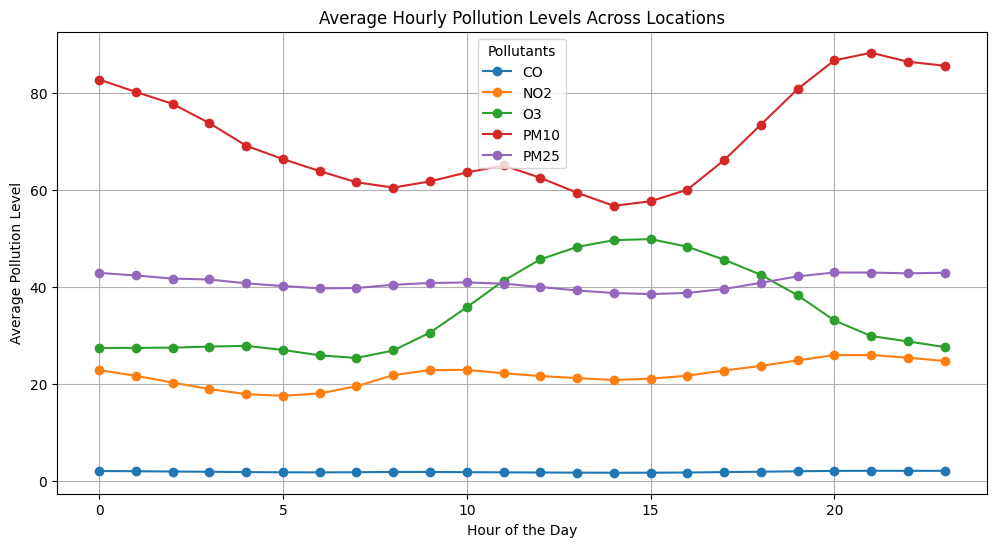

' \n Interpretation\nMorning Peaks: You might observe spikes during early morning hours (e.g., rush hour traffic).\nAfternoon Patterns: Ozone (O3) may peak during midday due to sunlight-driven chemical reactions.\nEvening Rise: PM10 and PM25 could increase in the evening due to heating systems or traffic.'

In [26]:
# Plot average hourly pollution for each pollutant
avg_hourly_pollution.plot(x='Hour', kind='line', marker='o', figsize=(12, 6))
plt.title('Average Hourly Pollution Levels Across Locations')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Pollution Level')
plt.legend(title='Pollutants')
plt.grid(True)
plt.show()

'''
 Interpretation
Morning Peaks: You might observe spikes during early morning hours (e.g., rush hour traffic).
Afternoon Patterns: Ozone (O3) may peak during midday due to sunlight-driven chemical reactions.
Evening Rise: PM10 and PM25 could increase in the evening due to heating systems or traffic.'''


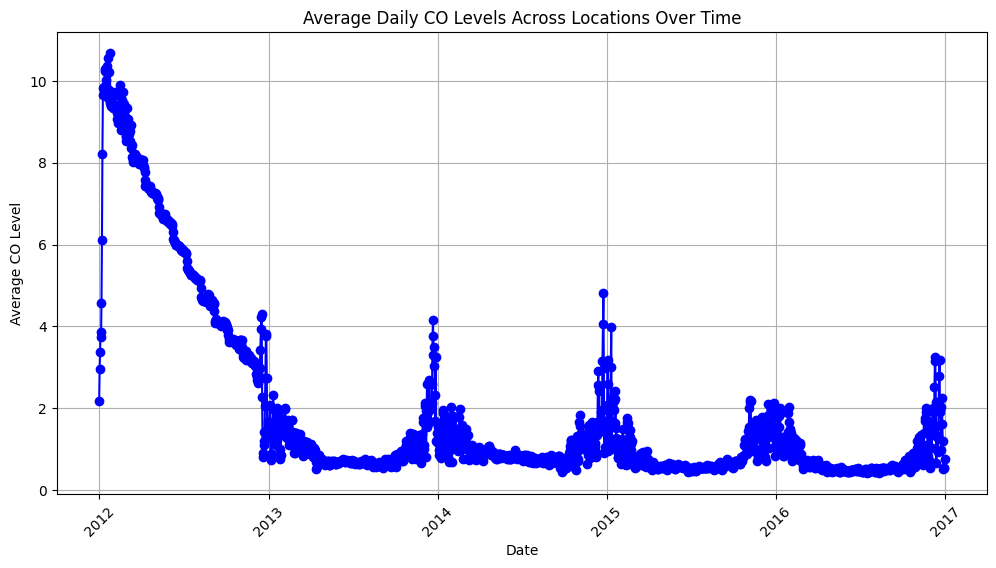

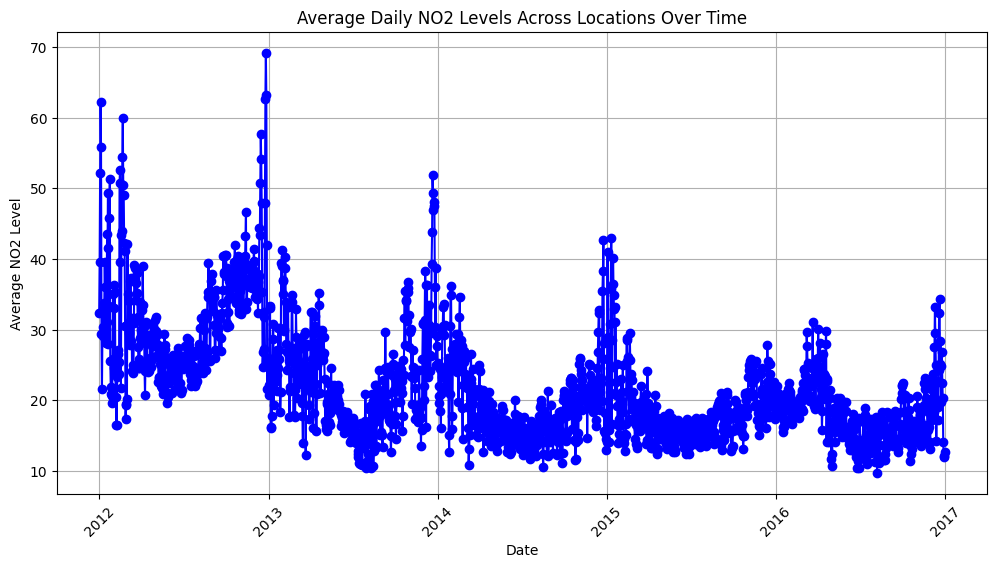

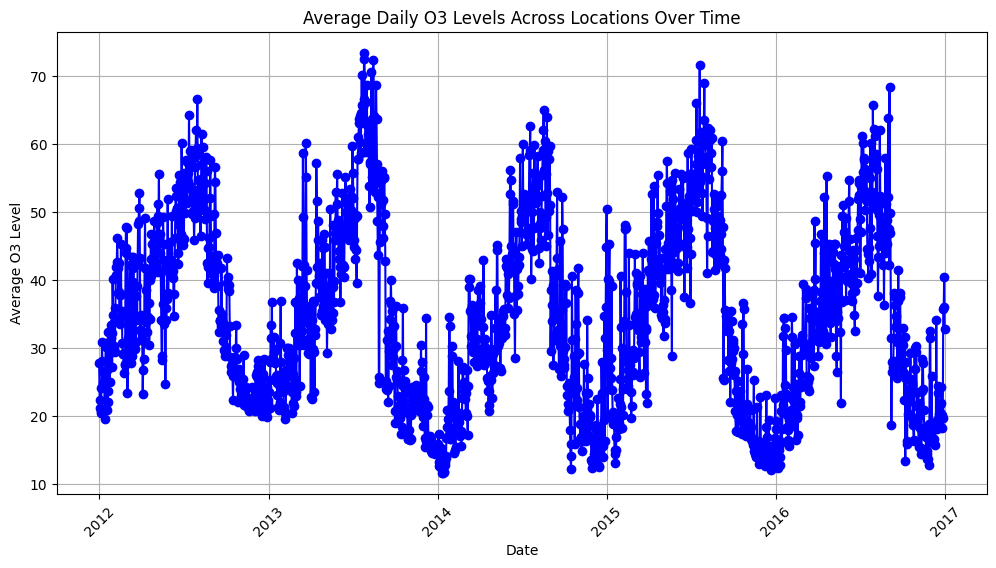

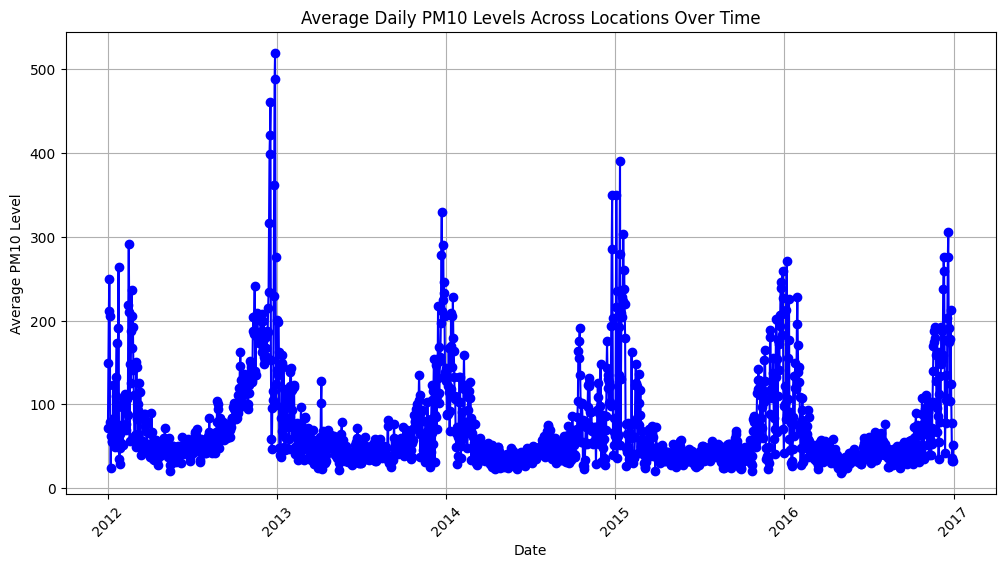

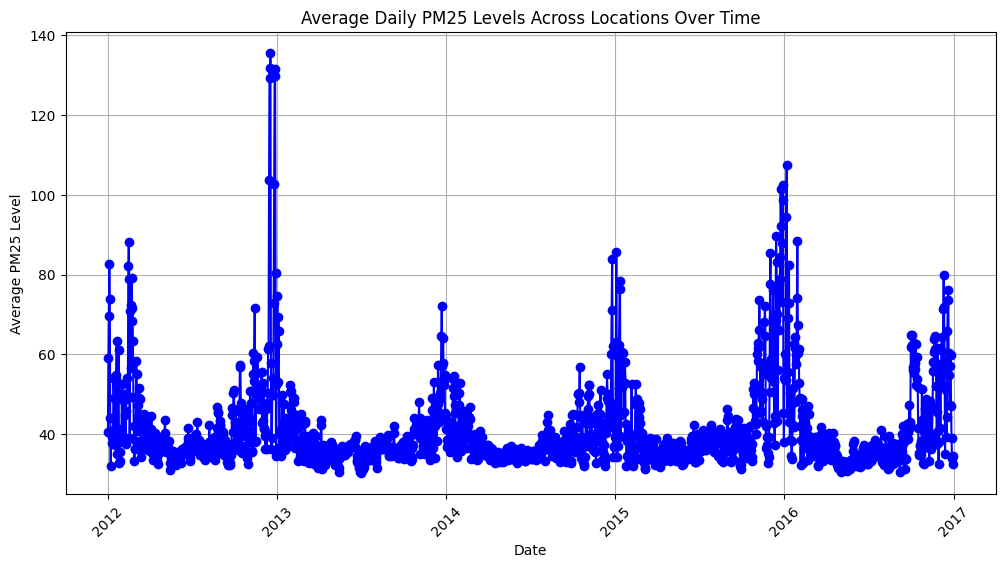

'\nYou’ll see 5 separate line plots, one for each pollutant:\n\nCO (Carbon Monoxide) – Daily average levels plotted over time.\nNO2 (Nitrogen Dioxide) – Daily average levels plotted over time.\nO3 (Ozone) – Daily average levels plotted over time.\nPM10 (Particulate Matter ≤ 10µm) – Daily average levels plotted over time.\nPM25 (Particulate Matter ≤ 2.5µm) – Daily average levels plotted over time.\nEach plot will have:\n\nX-axis: Dates\nY-axis: Average pollutant levels\nTrend Line: Showing daily variations in pollutant levels.\n\nInterpretation\nTrends Over Time: Identify whether pollution levels are increasing, decreasing, or showing seasonal patterns.\nSeasonal Variations: Observe spikes in certain months (e.g., winter might show high PM levels due to heating).\nAnomalies: Notice sudden peaks on specific days, possibly due to external factors like weather or events.\n'

In [27]:
'''Grouping: groupby('Date') aggregates data on a daily basis.
Aggregation: .mean() calculates the average pollution level for each pollutant across all locations for each day.
Reset Index: reset_index() ensures Date remains a column in the DataFrame.
Visualization: A separate line plot is generated for each pollutant showing how its average daily level changes over time. '''


# Group by Date and calculate daily average pollution levels
avg_daily_pollution = final_dataset.groupby('Date')[['CO', 'NO2', 'O3', 'PM10', 'PM25']].mean().reset_index()

# Plot each pollutant's daily average over time
pollutants = ['CO', 'NO2', 'O3', 'PM10', 'PM25']

for pollutant in pollutants:
    plt.figure(figsize=(12, 6))
    plt.plot(avg_daily_pollution['Date'], avg_daily_pollution[pollutant], marker='o', linestyle='-', color='b')
    plt.title(f'Average Daily {pollutant} Levels Across Locations Over Time')
    plt.xlabel('Date')
    plt.ylabel(f'Average {pollutant} Level')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
'''
You’ll see 5 separate line plots, one for each pollutant:

CO (Carbon Monoxide) – Daily average levels plotted over time.
NO2 (Nitrogen Dioxide) – Daily average levels plotted over time.
O3 (Ozone) – Daily average levels plotted over time.
PM10 (Particulate Matter ≤ 10µm) – Daily average levels plotted over time.
PM25 (Particulate Matter ≤ 2.5µm) – Daily average levels plotted over time.
Each plot will have:

X-axis: Dates
Y-axis: Average pollutant levels
Trend Line: Showing daily variations in pollutant levels.

Interpretation
Trends Over Time: Identify whether pollution levels are increasing, decreasing, or showing seasonal patterns.
Seasonal Variations: Observe spikes in certain months (e.g., winter might show high PM levels due to heating).
Anomalies: Notice sudden peaks on specific days, possibly due to external factors like weather or events.
'''


In [28]:
# Step 1: Calculate daily average PM10 across locations
avg_daily_PM10 = final_dataset.groupby('Date')['PM10'].mean().reset_index()

# Step 2: Filter days where average PM10 > 154 (worse than Moderate)
worse_than_moderate_PM10 = avg_daily_PM10[avg_daily_PM10['PM10'] > 154]

# Step 3: Extract Year from the Date column
worse_than_moderate_PM10['Year'] = pd.to_datetime(worse_than_moderate_PM10['Date']).dt.year

# Step 4: Count the number of such days per year
days_per_year = worse_than_moderate_PM10.groupby('Year').size().reset_index(name='Days_Worse_Than_Moderate')

# Display results
print(days_per_year)


   Year  Days_Worse_Than_Moderate
0  2012                        54
1  2013                        16
2  2014                        17
3  2015                        32
4  2016                        29


<ipython-input-28-c9e4b32f11ad>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worse_than_moderate_PM10['Year'] = pd.to_datetime(worse_than_moderate_PM10['Date']).dt.year


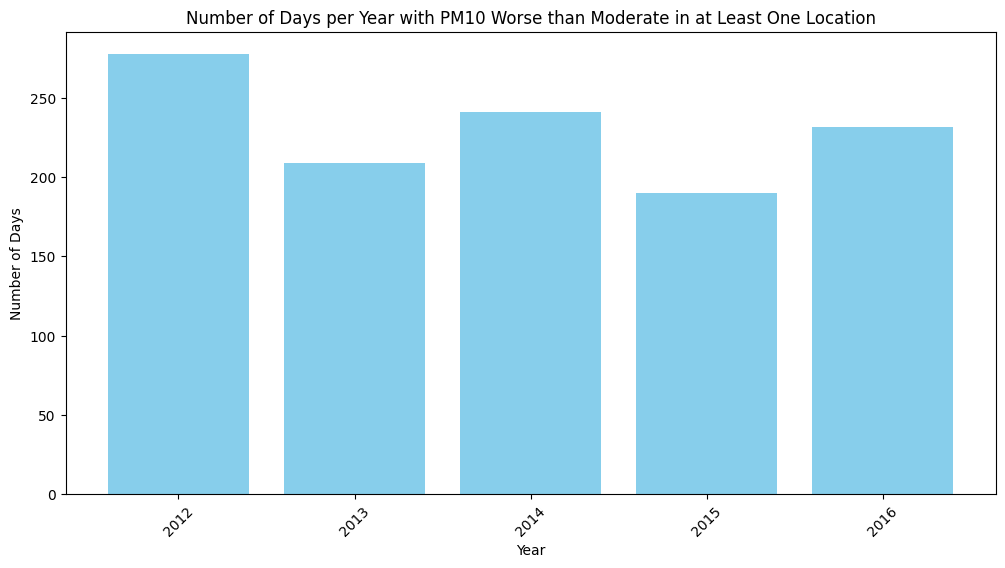

In [29]:
# Step 1: Filter rows where PM10 > 154 (worse than Moderate)
worse_than_moderate_PM10 = final_dataset[final_dataset['PM10'] > 154]

# Step 2: Identify unique days where PM10 exceeded threshold at any location
worse_than_moderate_PM10_days = worse_than_moderate_PM10[['Date']].drop_duplicates()

# Step 3: Extract Year from the Date column
worse_than_moderate_PM10_days['Year'] = pd.to_datetime(worse_than_moderate_PM10_days['Date']).dt.year

# Step 4: Count the number of such days per year
days_per_year = worse_than_moderate_PM10_days.groupby('Year').size().reset_index(name='Days_Worse_Than_Moderate')

# Step 5: Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(days_per_year['Year'], days_per_year['Days_Worse_Than_Moderate'], color='skyblue')
plt.title('Number of Days per Year with PM10 Worse than Moderate in at Least One Location')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.xticks(days_per_year['Year'], rotation=45)
plt.show()


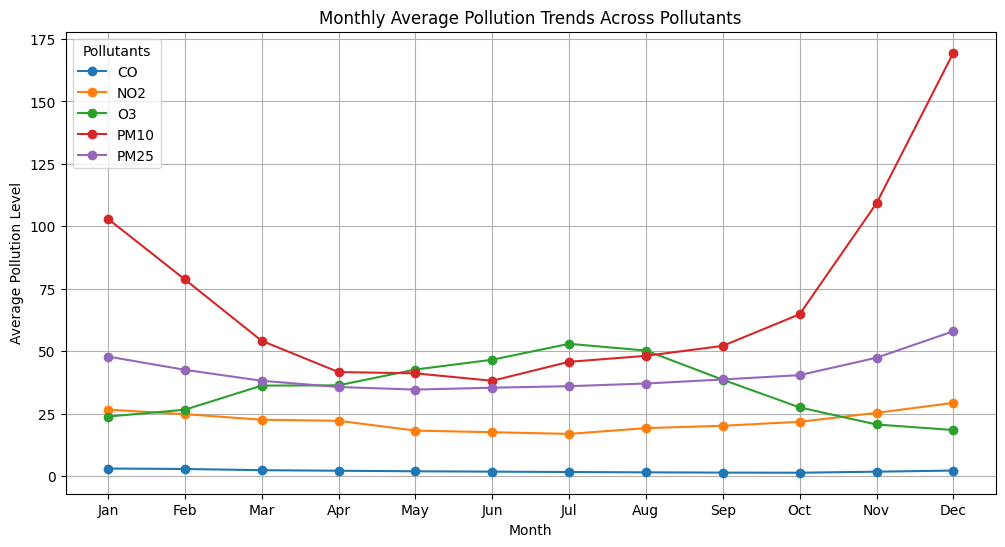

In [30]:
# Extract Month from Date column
final_dataset['Month'] = pd.to_datetime(final_dataset['Date']).dt.month

# Calculate Monthly Average for Each Pollutant
monthly_avg_pollution = final_dataset.groupby('Month')[['CO', 'NO2', 'O3', 'PM10', 'PM25']].mean().reset_index()

# Plot Monthly Trends
monthly_avg_pollution.plot(x='Month', kind='line', figsize=(12, 6), marker='o')
plt.title('Monthly Average Pollution Trends Across Pollutants')
plt.xlabel('Month')
plt.ylabel('Average Pollution Level')
plt.legend(title='Pollutants')
plt.xticks(range(1, 13),
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()


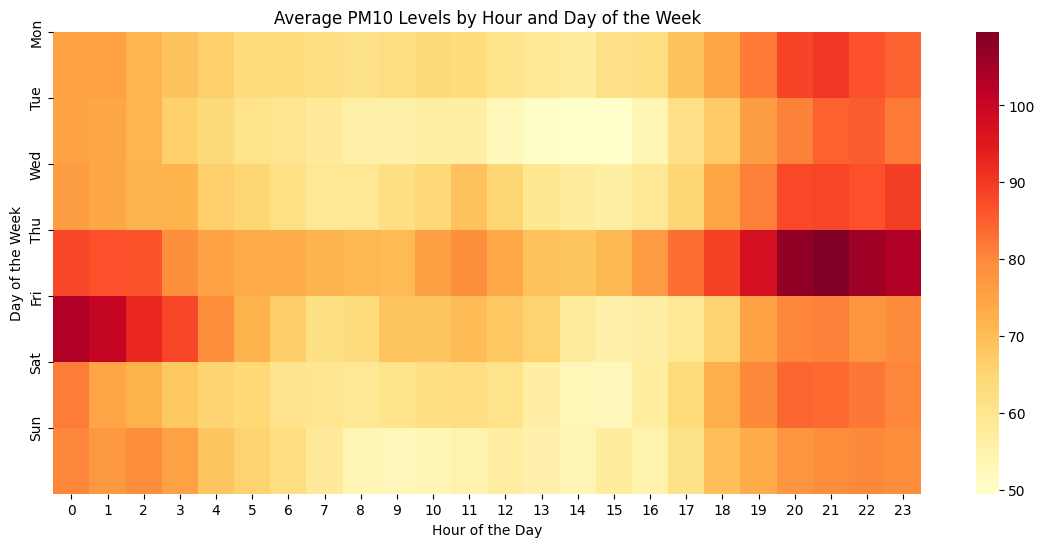

In [35]:
# Extract Day of the Week from Date column
final_dataset['Day_of_Week'] = pd.to_datetime(final_dataset['Date']).dt.dayofweek

# Extract Hour directly from the Time column
final_dataset['Hour'] = final_dataset['Time'].apply(lambda x: x.hour if pd.notnull(x) else None)

# Pivot Table for PM10 levels
heatmap_data = final_dataset.pivot_table(index='Day_of_Week',
                                         columns='Hour',
                                         values='PM10',
                                         aggfunc='mean')

# Plot Heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False)
plt.title('Average PM10 Levels by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.yticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


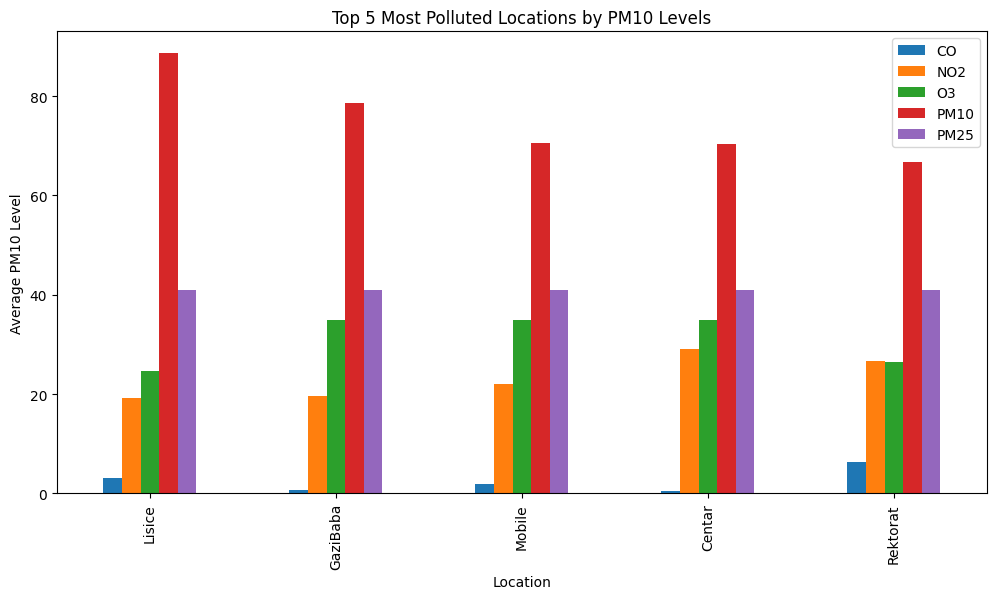

In [32]:
# Calculate Average Pollution Per Location for Each Pollutant
top_polluted_locations = final_dataset.groupby('Location')[['CO', 'NO2', 'O3', 'PM10', 'PM25']].mean()

# Plot Top 5 Locations per Pollutant
top_polluted_locations.nlargest(5, 'PM10').plot(kind='bar', figsize=(12, 6))
plt.title('Top 5 Most Polluted Locations by PM10 Levels')
plt.ylabel('Average PM10 Level')
plt.xlabel('Location')
plt.show()


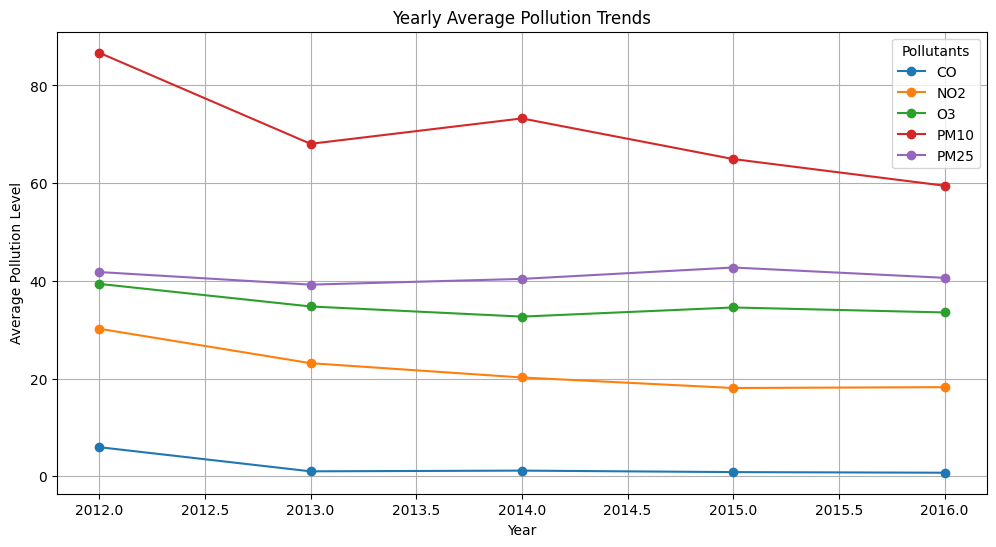

In [33]:
# Yearly Average Pollution
yearly_avg_pollution = final_dataset.groupby('Year')[['CO', 'NO2', 'O3', 'PM10', 'PM25']].mean().reset_index()

# Plot Yearly Trends
yearly_avg_pollution.plot(x='Year', kind='line', figsize=(12, 6), marker='o')
plt.title('Yearly Average Pollution Trends')
plt.xlabel('Year')
plt.ylabel('Average Pollution Level')
plt.legend(title='Pollutants')
plt.grid()
plt.show()


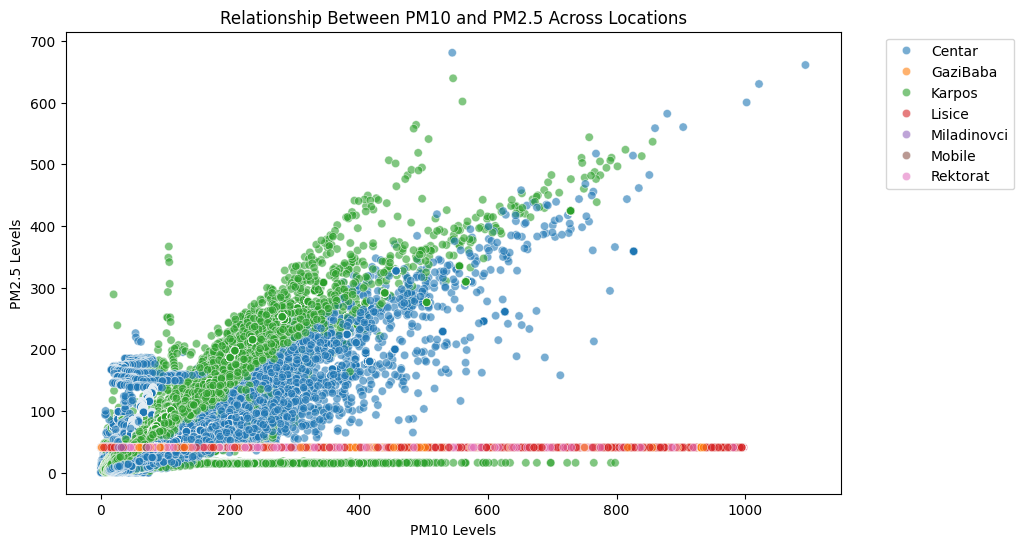

In [34]:
# Scatter Plot of PM10 vs PM2.5
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_dataset, x='PM10', y='PM25', hue='Location', alpha=0.6)
plt.title('Relationship Between PM10 and PM2.5 Across Locations')
plt.xlabel('PM10 Levels')
plt.ylabel('PM2.5 Levels')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-36-f131389c2eb7>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pm10_data['PM10'].interpolate(method='time', inplace=True)


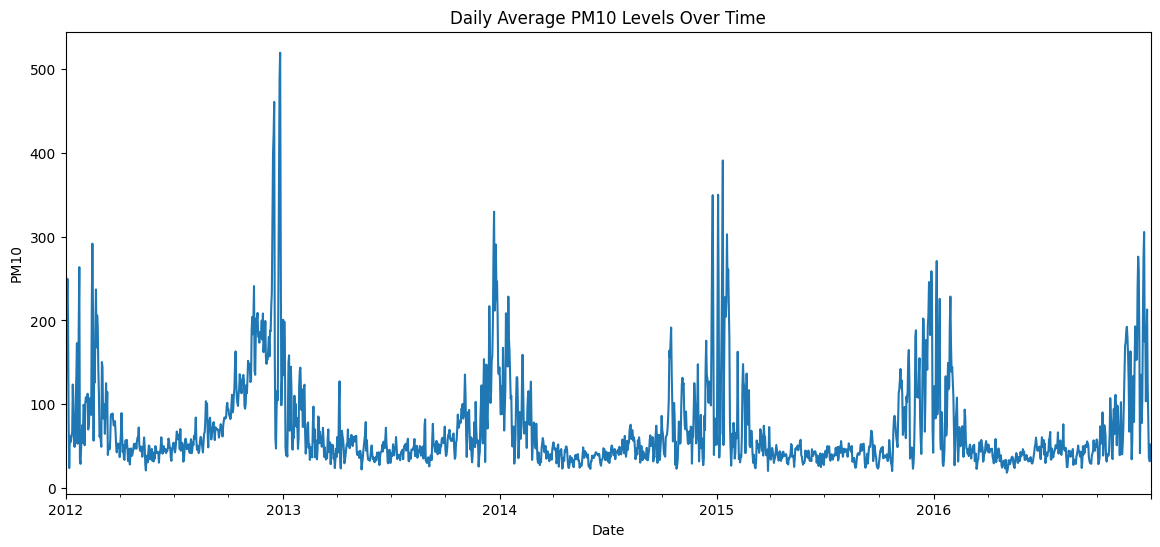

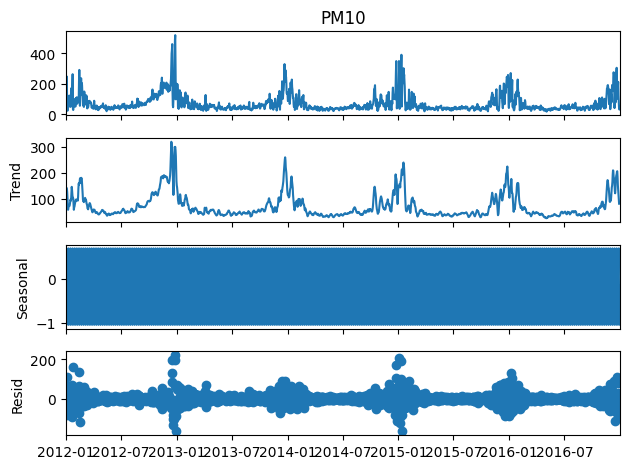

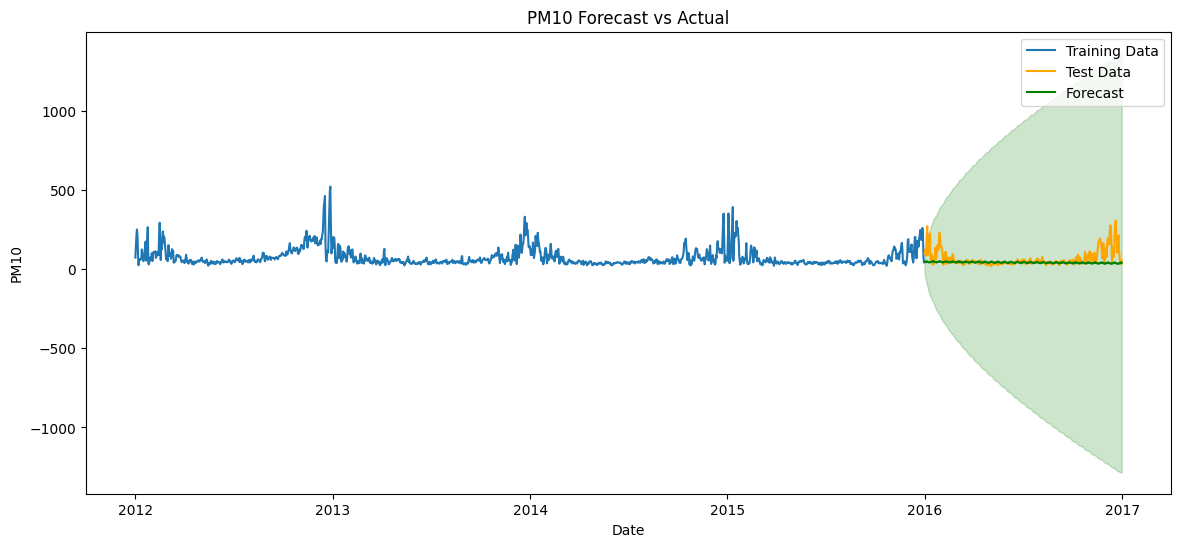

Root Mean Squared Error (RMSE): 55.35


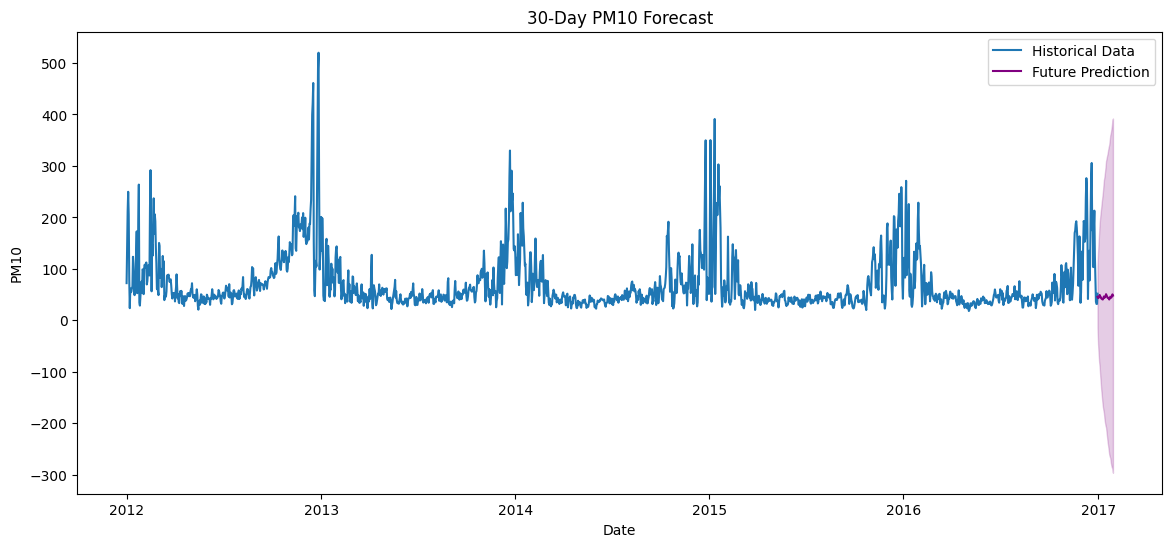

2016-01-01    45.802199
2016-01-02    43.357899
2016-01-03    43.736813
2016-01-04    45.301164
2016-01-05    49.391218
2016-01-06    46.795838
2016-01-07    45.323184
2016-01-08    42.512289
2016-01-09    42.049784
2016-01-10    40.857787
2016-01-11    40.642799
2016-01-12    43.260677
2016-01-13    46.526871
2016-01-14    44.151644
2016-01-15    44.729622
2016-01-16    46.676269
2016-01-17    50.870944
2016-01-18    48.435405
2016-01-19    46.255734
2016-01-20    43.872676
2016-01-21    43.770700
2016-01-22    42.396719
2016-01-23    40.570954
2016-01-24    42.974737
2016-01-25    46.168845
2016-01-26    43.859802
2016-01-27    44.377583
2016-01-28    46.371316
2016-01-29    50.520711
2016-01-30    48.122208
Freq: D, Name: predicted_mean, dtype: float64


In [36]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# ----------------------------------------------
# Step 1: Prepare the Dataset for Time Series
# ----------------------------------------------

# Ensure Date is in datetime format
final_dataset['Date'] = pd.to_datetime(final_dataset['Date'])

# Set Date as the index for time series analysis
pm10_data = final_dataset[['Date', 'PM10']].copy()
pm10_data = pm10_data.groupby('Date').mean()  # Average PM10 per day across locations
pm10_data = pm10_data.asfreq('D')  # Ensure daily frequency

# Handle Missing Values
pm10_data['PM10'].interpolate(method='time', inplace=True)

# Plot the PM10 time series
plt.figure(figsize=(14, 6))
pm10_data['PM10'].plot(title='Daily Average PM10 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('PM10')
plt.show()

# ----------------------------------------------
# Step 2: Decompose Time Series (Trend, Seasonality, Residuals)
# ----------------------------------------------
decomposition = seasonal_decompose(pm10_data['PM10'], model='additive')
decomposition.plot()
plt.show()

# ----------------------------------------------
# Step 3: Build the SARIMA Model
# ----------------------------------------------

# Split dataset into training and testing
train = pm10_data[:int(0.8 * len(pm10_data))]
test = pm10_data[int(0.8 * len(pm10_data)):]

# Fit SARIMA Model
model = SARIMAX(train['PM10'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

# Forecast on test set
forecast = results.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot Forecast vs Actual Data
plt.figure(figsize=(14, 6))
plt.plot(train.index, train['PM10'], label='Training Data')
plt.plot(test.index, test['PM10'], label='Test Data', color='orange')
plt.plot(test.index, forecast_mean, label='Forecast', color='green')
plt.fill_between(test.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='green', alpha=0.2)
plt.title('PM10 Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('PM10')
plt.legend()
plt.show()

# Evaluate Model Performance
rmse = np.sqrt(mean_squared_error(test['PM10'], forecast_mean))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# ----------------------------------------------
# Step 4: Predict Future PM10 Levels
# ----------------------------------------------

# Predict next 30 days
future_forecast = results.get_forecast(steps=30)
future_mean = future_forecast.predicted_mean
future_ci = future_forecast.conf_int()

# Plot Future Forecast
plt.figure(figsize=(14, 6))
plt.plot(pm10_data.index, pm10_data['PM10'], label='Historical Data')
plt.plot(pd.date_range(pm10_data.index[-1], periods=30, freq='D'),
         future_mean, label='Future Prediction', color='purple')
plt.fill_between(pd.date_range(pm10_data.index[-1], periods=30, freq='D'),
                 future_ci.iloc[:, 0],
                 future_ci.iloc[:, 1], color='purple', alpha=0.2)
plt.title('30-Day PM10 Forecast')
plt.xlabel('Date')
plt.ylabel('PM10')
plt.legend()
plt.show()

# Display future predictions
print(future_mean)


#General Concept and Analysis Summary
Air pollution is one of the most pressing environmental challenges affecting urban areas, and Skopje, North Macedonia, is no exception. In this analysis, we have examined air pollution data across multiple monitoring locations, focusing on key pollutants: CO, NO2, O3, PM10, and PM25. The dataset, which spans multiple years and contains temporal data segmented by date and time, allowed us to explore pollution patterns at various granularities.

Key Analytical Steps:
Maximum Pollution Events:
We identified timestamps when each pollutant reached its peak levels across different years and locations. This analysis highlighted the most critical periods for air pollution spikes.

Seasonal and Monthly Trends:
By analyzing monthly averages, we uncovered periods of the year with higher concentrations of pollutants. Winter months, in particular, stood out as periods of elevated pollution levels, likely due to increased use of fossil fuels for heating and reduced atmospheric dispersion.

Hourly and Daily Patterns:
Through heatmaps and hourly averages, we observed recurring daily patterns in pollutant levels. Traffic congestion during morning and evening rush hours emerged as significant contributors to heightened pollution, especially for NO2 and CO.

Air Quality Index Evaluation:
For PM10, we calculated the number of days each year when pollution levels exceeded the "moderate" air quality threshold across locations. The findings revealed consistent trends in poor air quality, emphasizing the need for targeted interventions.

Custom Visualizations:
Additional visualizations explored cross-pollutant correlations, yearly trends, and pollutant-specific peaks. These helped us better understand the interplay between pollutants and their dependency on factors like weather, traffic, and industrial activity.

# Conclusions Drawn from the Analysis
Seasonal Impact:
Air pollution peaks during winter months, primarily due to increased reliance on solid fuel for heating and reduced air circulation caused by weather conditions.

Traffic and Hourly Patterns:
Daily traffic patterns, particularly during morning and evening rush hours, contribute significantly to short-term pollution spikes, especially for NO2 and CO.

PM10 as a Key Indicator:
PM10 levels consistently exceed "moderate" air quality thresholds on many days each year. This pollutant serves as a strong indicator of poor air quality and health risks.

Spatial Variations:
Locations with higher traffic density and industrial activity exhibit persistently higher pollution levels.

#Prediction and Recommendations
While the dataset does not allow for highly precise predictions, certain trends suggest actionable insights:

Prediction:

If traffic congestion is reduced during peak hours (e.g., through improved public transportation or staggered work hours), pollutants like NO2 and CO could see measurable reductions.
If heating practices are optimized by promoting cleaner fuels and energy-efficient heating systems, winter pollution levels could significantly drop.

Recommendations for Actionable Steps:

Promote Green Transportation: Expand public transport options, incentivize electric vehicle use, and create car-free zones during peak hours.
Improve Heating Practices: Transition from solid fuels to cleaner alternatives, such as natural gas or renewable energy sources.
Real-time Monitoring and Alerts: Implement real-time air quality monitoring and public alert systems to reduce outdoor activity during peak pollution hours.
Urban Greening Projects: Increase urban vegetation and green spaces to help absorb pollutants.

#Future Outlook
If these measures are implemented, we can predict a gradual yet significant improvement in air quality across Skopje. A combination of policy interventions, public awareness, and technological innovations will be key in minimizing pollution levels. While our analysis is based on historical trends, continuous data monitoring and adaptive strategies are essential to ensure sustained improvement in air quality.

This study underscores the importance of data-driven decision-making in addressing environmental challenges and highlights actionable insights that policymakers, urban planners, and citizens can use to create a cleaner, healthier city.